<a href="https://colab.research.google.com/github/hkaido0718/IncompleteDiscreteChoice/blob/main/IncompleteModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Incomplete models

An _incomplete economic model_ involves

- $Y$: outcome
- $X$: covariates
- $U$: latent variables
- $U|X\sim F_\theta(\cdot|x)$: conditional distribution of $U$
- $\theta=(\beta_1',\beta_2',\Delta_1,\Delta_2)'$: parameter.

For each $(x,u)$, the model makes a prediction about the set of values $Y$ can take, which we call $G(u|x,\theta)$.

An incomplete model's prediction is summarized by
$$Y\in G(U|X,\theta).$$

That is, the model predicts a set $G$ of outcome values, and the researcher observes $Y$. However, the model is silent about how $Y$ is selected from the predicted set.


# Game predictions

Let's consider a two-player entry game summarized in the following table.

|  | $Y_2=0$ | $Y_2=1$ |
|----------|----------|----------|
| Enter ($Y_1=0$)  | $(0,0)$   | $(0,X_2'\beta_2+U_2)$   |
| Do not enter ($Y_1=1$)  | $(X_1'\beta_1+U_1, 0)$  | $(X_1'\beta_1+\Delta_1+U_1,X_2'\beta_2+\Delta_2+U_2)$  |

Consider a pure strategy Nash equilibrium (PSNE). An outcome value $y=(y_1,y_2)$ is a PSNE if the following best response conditions hold for any $y'_1$ and $y'_2$.

\begin{align*}
\pi_1(y_1,y_2)\ge \pi_1(y'_1,y_2)\\
\pi_2(y_1,y_2)\ge \pi_2(y_1,y_2')
\end{align*}

For example, consider $y=(0,0)$. It is a PSNE if
\begin{align*}
	\pi_1(0,0)&\ge \pi_1(1,0)\\
  \pi_2(0,0)&\ge \pi_2(0,1).
\end{align*}
According to the payoff table, $\pi_1(0,0)=\pi_2(0,0)=0$. Therefore,
\begin{align*}
0&\ge X_1'\beta_1+U_1\\
0&\ge X_2'\beta_2+U_2.
\end{align*}
Hence, we can write
\begin{align*}
G(U|X;\theta)=\{(0,0)\}
\end{align*}
for any $(X,U)$ satisfying $X_1'\beta_1+U_1\le 0$ and $X_2'\beta_2+U_2\le 0$. Fixing $X=x$, we can write this event as
\begin{align}
U_1&\le -X_1'\beta_1\\
U_2&\le -X_2'\beta_2.
\end{align}
Let's plot this region. Below, we set $\beta_1=2$ and $\beta_2=3$, and suppose $x_1=x_2=1$ (you can change them to any value you want).




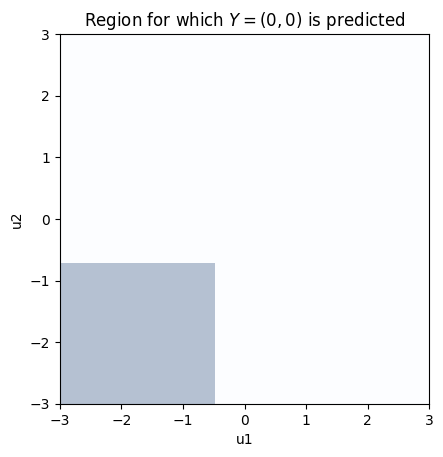

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example values for beta_1 and beta_2
beta_1 = 0.5
beta_2 = 0.75

# Define a grid of u1 and u2 values
u1 = np.linspace(-3, 3, 100)
u2 = np.linspace(-3, 3, 100)
U1, U2 = np.meshgrid(u1, u2)

# Define the region defined by the inequalities
region00 = (U1 <= -beta_1) & (U2 <= -beta_2)

# Plot the region
plt.figure()
plt.imshow(region00, extent=(-3, 3, -3, 3), origin='lower', cmap='Blues', alpha=0.3)
plt.xlabel('u1')
plt.ylabel('u2')
plt.gca().patch.set_color('white')
plt.title('Region for which $Y=(0,0)$ is predicted')
plt.grid(False)
plt.show()


Similarly, $Y=(1,0)$ is a solution if
\begin{align*}
	\pi_1(1,0)&\ge \pi_1(0,0)\\
  \pi_2(1,0)&\ge \pi_2(1,1)
\end{align*}
which is equivalent to
\begin{align*}
	\underbrace{X_1'\beta_1+U_1}_{\pi_1(1,0)}&\ge\underbrace{0}_{\pi_1(0,0)}\\
  \underbrace{0}_{\pi_2(1,0)}&\ge \underbrace{X_2'\beta_2+\Delta_2+U_2}_{\pi_2(1,1)}
\end{align*}
This can be written as
\begin{align}
U_1&\ge -X_1'\beta_1\\
U_2&\le -X_2'\beta_2-\Delta_2
\end{align}
 Let's plot the region.

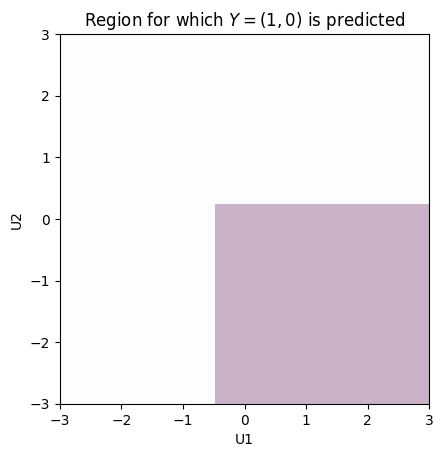

In [2]:
# Define the region defined by the inequalities
delta_2 = -1
region10 = (U1 >= -beta_1) & (U2 <= -beta_2 - delta_2)

# Plot the region
plt.figure()
plt.imshow(region10, extent=(-3, 3, -3, 3), origin='lower', cmap='BuPu', alpha=0.3)
plt.xlabel('U1')
plt.ylabel('U2')
plt.gca().patch.set_color('white')
plt.title('Region for which $Y=(1,0)$ is predicted')
plt.grid(False)
plt.show()

Let's continue. The argument is essentially the same as the previous case. $Y=(0,1)$ is a PSNE when
\begin{align}
U_1&\le -X_1'\beta_1-\Delta_1\\
U_2&\ge -X_2'\beta_2
\end{align}
Hence, the region $S_{(0,1)|x,\theta}$ is

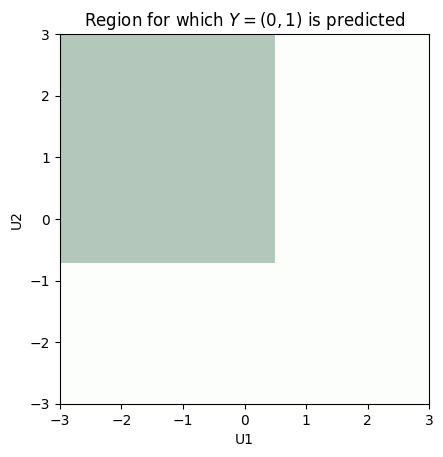

In [3]:
delta_1 = -1
region01 = (U1 <= -beta_1-delta_1) & (U2 >= -beta_2)

# Plot the region
plt.figure()
plt.imshow(region01, extent=(-3, 3, -3, 3), origin='lower', cmap='Greens', alpha=0.3)
plt.xlabel('U1')
plt.ylabel('U2')
plt.gca().patch.set_color('white')
plt.title('Region for which $Y=(0,1)$ is predicted')
plt.grid(False)
plt.show()

Finally, $Y=(1,1)$ is a PNSE when
\begin{align*}
X_1'\beta_1+\Delta_1+U_1\ge 0\\
X_2'\beta_2+\Delta_2+U_2\ge 0
\end{align*}
which is equivalent to
\begin{align}
U_1&\ge-X_1'\beta_1-\Delta_1\\
U_2&\ge-X_2'\beta_2-\Delta_2.
\end{align}
We call this region region11.

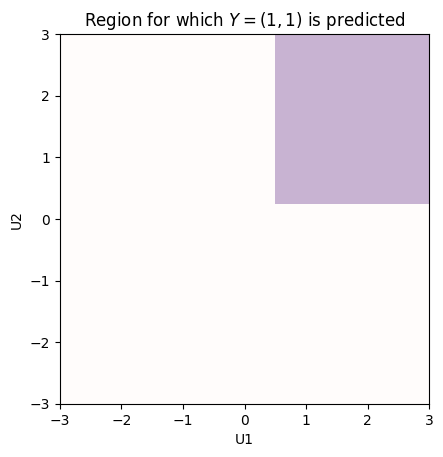

In [4]:
region11 = (U1 >= -beta_1-delta_1) & (U2 >= -beta_2-delta_2)

# Plot the region
plt.figure()
plt.imshow(region11, extent=(-3, 3, -3, 3), origin='lower', cmap='RdPu', alpha=0.3)
plt.xlabel('U1')
plt.ylabel('U2')
plt.gca().patch.set_color('white')
plt.title('Region for which $Y=(1,1)$ is predicted')
plt.grid(False)
plt.show()

Note that region01 and region10 overlap. Over this region, the model predicts multiple equilibria. Putting all of them together yields the following prediction.

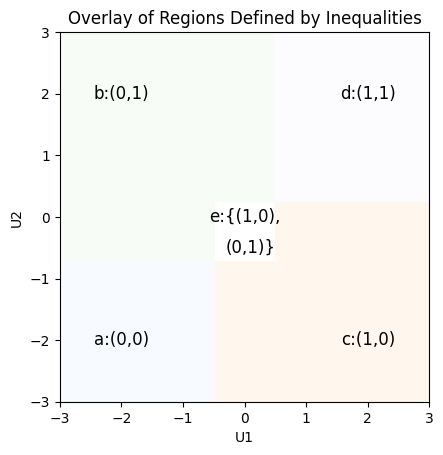

In [5]:
overlap_region = region10 & region01

# Mask the areas outside the regions
masked_region00 = np.ma.masked_where(~region00, region00)
masked_region01 = np.ma.masked_where(~region01 | overlap_region, region01)
masked_region10 = np.ma.masked_where(~region10 | overlap_region, region10)
masked_region11 = np.ma.masked_where(~region11, region11)
masked_overlap = np.ma.masked_where(~overlap_region, overlap_region)

# Plot the regions with distinct colors
plt.figure()
plt.imshow(masked_region00, extent=(-3, 3, -3, 3), origin='lower', cmap='Blues', alpha=0.9)
plt.imshow(masked_region01, extent=(-3, 3, -3, 3), origin='lower', cmap='Greens', alpha=0.9)
plt.imshow(masked_region10, extent=(-3, 3, -3, 3), origin='lower', cmap='Oranges', alpha=0.9)
plt.imshow(masked_region11, extent=(-3, 3, -3, 3), origin='lower', cmap='Purples', alpha=0.9)
plt.imshow(masked_overlap, extent=(-3, 3, -3, 3), origin='lower', cmap='Reds', alpha=0)

plt.text(2, -2, 'c:(1,0)', color='black', fontsize=12, ha='center', va='center')
plt.text(2, 2, 'd:(1,1)', color='black', fontsize=12, ha='center', va='center')
plt.text(-2, 2, 'b:(0,1)', color='black', fontsize=12, ha='center', va='center')
plt.text(-2, -2, 'a:(0,0)', color='black', fontsize=12, ha='center', va='center')
plt.text(0, 0, 'e:{(1,0),', color='black', fontsize=12, ha='center', va='center')
plt.text(0.1, -0.5, '(0,1)}', color='black', fontsize=12, ha='center', va='center')

plt.xlabel('U1')
plt.ylabel('U2')
plt.title('Overlay of Regions Defined by Inequalities')
plt.grid(False)
plt.show()

Above, we can see that region01 and region10 overlap. Over this intersection, either $y=(1,0)$ or $y=(0,1)$ can occur.  Hence, the model predicts multiple equilibria. We call this region "e". In other regions (labeled a, b, c, and d), the predicted outcome is unique.

The correspondence can be summarized as

\begin{align}
G(U|X;\theta)=
\begin{cases}
\{(0, 0)\} & u\in a\\
\{(0, 1)\} & u\in b\\
\{(1, 0)\} & u\in c\\
\{(1, 1)\} & u\in d\\
\{(1, 0), (0, 1)\} & u\in e.
\end{cases}
\end{align}